In [1]:
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

In [5]:
# 鸢尾花数据集
li = load_iris()

print(type(li.data))

print(li.data.shape)
print(li.target)
print(li.DESCR)
print('*' * 20)
print(li.feature_names)
print(li.target_names)

<class 'numpy.ndarray'>
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    =====

In [6]:
# 数据分割  训练集、测试集

x_train, x_test, y_train, y_test = train_test_split(li.data, li.target, test_size=0.25,
                                                    random_state=1)  # random_state指定随机规则

print("训练集特征值和目标值：", x_train, y_train)
print("训练集特征值shape", x_train.shape)

print("测试集特征值和目标值：", x_test, y_test)
print("测试集特征值shape", x_test.shape)

训练集特征值和目标值： [[6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 4.1 1.5 0.1]
 [6.7 3.3 5.7 2.1]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [6.4 2.7 5.3 1.9]
 [5.9 3.  5.1 1.8]
 [5.2 3.5 1.5 0.2]
 [5.1 3.3 1.7 0.5]


In [15]:
news = fetch_20newsgroups(subset='all', data_home='./data')

In [14]:
# fit_transform 训练集用  transformer 测试集

# 分类估计器

## 1、K近邻

In [2]:
# K近邻
"""
K-近邻预测用户签到位置
:return:None
"""
# 读取数据
data = pd.read_csv("./data/FBlocation/train.csv")

print(data.head(3))
print(data.shape)

   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
(29118021, 6)


## 数据预处理

In [3]:
# 数据预处理
# 数据减少（降低计算时间）
data = data.query('x>1.0 & x<1.25& y>2.5&y<2.75')
# 1、time进行转换，获取相应的day、weekday、hour重要时间特征
# time-> 标准时间格式
time_value = pd.to_datetime(data['time'], unit='s')
print(time_value)
# 转为时间索引，后续可以方便提取时间中的相关信息
time_value = pd.DatetimeIndex(time_value)
print('-' * 20)
print(time_value)
print('-' * 20)
# 从time_value中提取信息，插入到data中
data.insert(data.shape[1], 'day', time_value.day)
data.insert(data.shape[1], 'hour', time_value.hour)
data.insert(data.shape[1], 'weekday', time_value.weekday)
# 删除原来时间戳time
data = data.drop(['time'], axis=1)
print('-' * 20)
data

600        1970-01-01 18:09:40
957        1970-01-10 02:11:10
4345       1970-01-05 15:08:02
4735       1970-01-06 23:03:03
5580       1970-01-09 11:26:50
                   ...        
29100203   1970-01-01 10:33:56
29108443   1970-01-07 23:22:04
29109993   1970-01-08 15:03:14
29111539   1970-01-04 00:53:41
29112154   1970-01-08 23:01:07
Name: time, Length: 17710, dtype: datetime64[ns]
--------------------
DatetimeIndex(['1970-01-01 18:09:40', '1970-01-10 02:11:10',
               '1970-01-05 15:08:02', '1970-01-06 23:03:03',
               '1970-01-09 11:26:50', '1970-01-02 16:25:07',
               '1970-01-04 15:52:57', '1970-01-01 10:13:36',
               '1970-01-09 15:26:06', '1970-01-08 23:52:02',
               ...
               '1970-01-07 10:03:36', '1970-01-09 11:44:34',
               '1970-01-04 08:07:44', '1970-01-04 15:47:47',
               '1970-01-08 01:24:11', '1970-01-01 10:33:56',
               '1970-01-07 23:22:04', '1970-01-08 15:03:14',
               '1970-

,row_id,x,y,accuracy,place_id,day,hour,weekday
600,600,1.2214,2.7023,17,6683426742,1,18,3
957,957,1.1832,2.6891,58,6683426742,10,2,5
4345,4345,1.1935,2.6550,11,6889790653,5,15,0
4735,4735,1.1452,2.6074,49,6822359752,6,23,1
5580,5580,1.0089,2.7287,19,1527921905,9,11,4
...,...,...,...,...,...,...,...,...
29100203,29100203,1.0129,2.6775,12,3312463746,1,10,3
29108443,29108443,1.1474,2.6840,36,3533177779,7,23,2
29109993,29109993,1.0240,2.7238,62,6424972551,8,15,3
29111539,29111539,1.2032,2.6796,87,3533177779,4,0,6


## data特征筛选

In [4]:
# 查看各个地方place_id的打卡人数量
place_count = data.groupby('place_id').count()
print(place_count)
# 针对一些访问人数少的地点进行数据筛选，认为这些地点是噪音
tf = place_count[place_count.row_id > 3].reset_index()
# 根据tf对data数据完成筛选
data = data[data['place_id'].isin(tf.place_id)]
print(data)
#
#
# 获得数据中特征值和目标值（place_id）
y = data['place_id']
x = data.drop(['place_id'], axis=1)
# 无用特征值，舍弃
x = x.drop(['row_id'], axis=1)
print(x.shape)
print(x.columns)

# 数据集进行分割，75/25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

            row_id     x     y  accuracy   day  hour  weekday
place_id                                                     
1012023972       1     1     1         1     1     1        1
1057182134       1     1     1         1     1     1        1
1059958036       3     3     3         3     3     3        3
1085266789       1     1     1         1     1     1        1
1097200869    1044  1044  1044      1044  1044  1044     1044
...            ...   ...   ...       ...   ...   ...      ...
9904182060       1     1     1         1     1     1        1
9915093501       1     1     1         1     1     1        1
9946198589       1     1     1         1     1     1        1
9950190890       1     1     1         1     1     1        1
9980711012       5     5     5         5     5     5        5

[805 rows x 7 columns]
            row_id       x       y  accuracy    place_id  day  hour  weekday
600            600  1.2214  2.7023        17  6683426742    1    18        3
957            9

# 特征工程

In [5]:
# 标准化、归一化
std = StandardScaler()
# 对训练集，测试集进行标准化
x_train = std.fit_transform(x_train)
print(std.mean_)
print(std.var_)
x_test = std.fit_transform(x_test)
print('-' * 20)
print(std.mean_)
print(std.var_)

[ 1.12295735  2.63237278 81.34938525  5.10064628 11.44293821  3.10135561]
[5.98489138e-03 4.86857391e-03 1.19597480e+04 7.32837915e+00
 4.83742660e+01 2.81838404e+00]
--------------------
[ 1.12134206  2.6342161  81.72907801  5.03404255 11.55248227  3.10378251]
[5.93758840e-03 4.92155888e-03 1.21106023e+04 7.52886475e+00
 4.76543378e+01 2.70057671e+00]


In [9]:
# 模型训练
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
print(y_predict)
print('准确率%s' % knn.score(x_test, y_test))

[5689129232 1097200869 2355236719 ... 4932578245 6424972551 4492549925]
准确率0.4806146572104019


In [12]:
# 调参--网格搜索法
param = {'n_neighbors': [3, 5, 10, 12, 15]}
# 网格搜索，cv3折交叉验证：2折训练，1折验证
gc = GridSearchCV(knn, param_grid=param, cv=3)
gc.fit(x_train, y_train)

print("在测试集上准确率：", gc.score(x_test, y_test))
print('-' * 20)
print("在交叉验证当中最好的结果：", gc.best_score_)
print('-' * 20)
print("选择最好的模型是：", gc.best_estimator_)
print('-' * 20)
print("每个超参数每次交叉验证的结果：", gc.cv_results_)

C:\DevEnvironment\Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


在测试集上准确率： 0.47848699763593383
--------------------
在交叉验证当中最好的结果： 0.4596467484726366
--------------------
选择最好的模型是： KNeighborsClassifier(n_neighbors=10)
--------------------
每个超参数每次交叉验证的结果： {'mean_fit_time': array([0.00555468, 0.00602126, 0.00729974, 0.00718379, 0.00591946]), 'std_fit_time': array([4.17948835e-04, 3.20321964e-05, 3.27611013e-03, 1.56505279e-03,
       6.53461818e-04]), 'mean_score_time': array([0.05285891, 0.05778893, 0.0867668 , 0.07324497, 0.07537476]), 'std_score_time': array([0.00155763, 0.00317488, 0.03040918, 0.00253189, 0.00068106]), 'param_n_neighbors': masked_array(data=[3, 5, 10, 12, 15],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 10}, {'n_neighbors': 12}, {'n_neighbors': 15}], 'split0_test_score': array([0.44468085, 0.4607565 , 0.46170213, 0.45650118, 0.45508274]), 'split1_test_score': array([0.43390873, 0.45660913, 0.45542681, 0.45

## 2、朴素贝叶斯

In [6]:
# 朴素贝叶斯文本分类
news = fetch_20newsgroups(subset='all', data_home='data')

print(len(news.data))
print(news.target)
print(news.target_names)

x_train, x_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.25, random_state=1)

# 文本数据特征抽取
tf = TfidfVectorizer()

x_train = tf.fit_transform(x_train)

x_test = tf.transform(x_test)

mlt = MultinomialNB(alpha=1.0)

mlt.fit(x_train, y_train)

y_predict = mlt.predict(x_test)

print('预测的文章类别', y_predict)

print('测试集准确率', mlt.score(x_test, y_test))

print('精确率和召回率（该文本中召回率无用）', classification_report(y_test, y_predict, target_names=news.target_names))

y_test = np.where(y_test == 0, 1, 0)
y_predict = np.where(y_predict == 0, 1, 0)

print('auc', roc_auc_score(y_test, y_predict))


18846
[10  3 17 ...  3  1  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
预测的文章类别 [16 19 18 ... 13  7 14]
测试集准确率 0.8518675721561969
精确率和召回率（该文本中召回率无用）                           precision    recall  f1-score   support

             alt.atheism       0.91      0.77      0.83       199
           comp.graphics       0.83      0.79      0.81       242
 comp.os.ms-windows.misc       0.89      0.83      0.86       263
comp.sys.ibm.pc.hardware       0.80      0.83      0.81       262
   comp.sys.mac.hardware       0.90      0.88      0.89       234
          comp.windows.x       0.92      0.85      0.88       230
            misc.forsale       0.96 

## 3、决策树

In [19]:
# 决策树对泰坦尼克号生死预测
# 数据读取
titan = pd.read_csv('./data/titanic.txt')
# 处理数据, 指定确认特征值，目标值
x = titan[['pclass', 'age', 'sex']]
y = titan['survived']
titan.info()

# 发现age存在缺失值问题
x['age'].fillna(x['age'].mean(), inplace=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(x_train.head())

# 特征处理
dict = DictVectorizer(sparse=False)

x_train = dict.fit_transform(x_train.to_dict(orient='records'))
print('-' * 20)
print(type(x_train))
print('-' * 20)
print(dict.get_feature_names_out())
print('-' * 20)
x_test = dict.transform(x_test.to_dict(orient='records'))
print(x_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB
    pclass        age     sex
949    3rd  31.194181    male
213    1st  31.194181    male
88     1st  50.000000    male
261    1st  49.000000    male
434    2nd  24.000000  female
--------------------
<class 'numpy.ndarray'>
--------------------
['age' 'pclass=1st' 'pclass=2nd' 'pclass=3rd' 'sex=female' 'sex

C:\Users\JP\AppData\Local\Temp\ipykernel_8764\4122828498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['age'].fillna(x['age'].mean(),inplace=True)


In [17]:
# 决策树
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
print('准确率', dec.score(x_test, y_test))
# 导出结构
export_graphviz(dec, out_file='tree.dot',
                feature_names=['年龄', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', '女性', '男性'])

准确率 0.8145896656534954


In [21]:
# 随机森林
# n_jobs多线程
rf = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators': [80, 120, 200, 300, 500, 800, 1200], 'max_depth': [2, 3, 5, 8, 15, 25]}

gc = GridSearchCV(rf, param_grid=param, cv=3)
gc.fit(x_train, y_train)

print("准确率：", gc.score(x_test, y_test))

print("查看选择的参数模型：", gc.best_params_)

print("选择最好的模型是：", gc.best_estimator_)

print("每个超参数每次交叉验证的结果：", gc.cv_results_)


准确率： 0.8054711246200608
查看选择的参数模型： {'max_depth': 3, 'n_estimators': 300}
选择最好的模型是： RandomForestClassifier(max_depth=3, n_estimators=300, n_jobs=-1)
每个超参数每次交叉验证的结果： {'mean_fit_time': array([1.01925508, 0.42893537, 0.69065396, 0.14514105, 0.18362768,
       0.26390648, 0.41690604, 0.04562529, 0.06909124, 0.08954366,
       0.14094289, 0.19539825, 0.26668715, 0.41428328, 0.04555702,
       0.06511323, 0.08765817, 0.14722466, 0.18983603, 0.27683663,
       0.40984472, 0.04512095, 0.06796122, 0.09002097, 0.14648183,
       0.18820341, 0.27698922, 0.43711082, 0.04662267, 0.07098659,
       0.09098212, 0.15113529, 0.20324477, 0.2755185 , 0.43467355,
       0.04625034, 0.06809553, 0.09448322, 0.14921331, 0.1925571 ,
       0.29479567, 0.42418679]), 'std_fit_time': array([1.35226117e+00, 2.38037877e-01, 4.70134675e-01, 1.03910724e-03,
       8.19903372e-04, 5.42927703e-03, 1.43647301e-02, 3.77337504e-03,
       4.39298002e-03, 2.13725770e-03, 1.02069889e-03, 1.60352697e-02,
       1.01701046e-0

# 回归估计器

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib

In [3]:
lb = pd.read_csv('./data/boston.txt')
x = lb[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = lb[['MEDV']]
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [30]:
# 分割数据集到训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
#
print(x_train.shape)
#
# # 进行标准化处理(?) 目标值处理？
# # 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()
#
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# 目标值进行了标准化
std_y = StandardScaler()
#
temp = y_train
print(temp)
y_train = std_y.fit_transform(y_train)  # 目标值是一维的，这里需要传进去2维的.reshape(-1,1)

y_test = std_y.transform(y_test)
y_train

(379, 13)
     MEDV
502  20.6
172  23.1
80   28.0
46   20.0
318  23.1
..    ...
255  20.9
72   22.8
396  12.5
235  24.0
37   21.0

[379 rows x 1 columns]


array([[-0.19582006],
       [ 0.0847902 ],
       [ 0.63478631],
       [-0.26316652],
       [ 0.0847902 ],
       [ 0.298054  ],
       [-1.41928078],
       [ 0.17458549],
       [ 1.54396354],
       [-1.0039776 ],
       [-1.08254847],
       [ 1.95926673],
       [-1.34070991],
       [-0.19582006],
       [-0.51010354],
       [-0.31928857],
       [ 0.15213666],
       [ 0.69090836],
       [ 0.21948313],
       [ 0.16336107],
       [-0.36418621],
       [ 0.67968395],
       [-0.20704447],
       [ 1.28580211],
       [-0.88050909],
       [-0.21826888],
       [-0.71214293],
       [-1.01520201],
       [ 0.9490698 ],
       [ 0.57866426],
       [ 0.23070754],
       [ 0.23070754],
       [ 0.30927841],
       [ 2.40824314],
       [-0.04990272],
       [ 0.43274692],
       [-0.91418232],
       [-0.17337123],
       [-0.25194211],
       [ 0.0847902 ],
       [-1.03765083],
       [-0.68969411],
       [ 0.27560518],
       [-0.2407177 ],
       [ 0.01744374],
       [-0

In [16]:
# # estimator预测
# # # 正规方程求解方式预测结果，正规方程进行线性回归
lr = LinearRegression()
# #
lr.fit(x_train, y_train)
#
print('回归系数', lr.coef_)  #回归系数可以看特征与目标之间的相关性
#
y_predict = lr.predict(x_test)
# 预测测试集的房子价格，通过inverse得到真正的房子价格
y_lr_predict = std_y.inverse_transform(y_predict)
# 保存训练好的模型
joblib.dump(lr, "./test.pkl")
# numpy nparray
print("正规方程测试集里面每个房子的预测价格：", y_lr_predict[:10])
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

model = joblib.load("./test.pkl")
# # 因为目标值进行了标准化，一定要把预测后的值逆向转换回来
y_predict = model.predict(x_test)

#
print("保存的模型预测的结果：", y_predict)
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

print("正规方程inverse后的均方误差：", mean_squared_error(std_y.inverse_transform(y_test),
                                                         std_y.inverse_transform(y_predict)))

回归系数 [[-0.12026411  0.15044778  0.02951803  0.07470354 -0.28043353  0.22170939
   0.02190624 -0.35275513  0.29939558 -0.2028089  -0.23911894  0.06305081
  -0.45259462]]
正规方程测试集里面每个房子的预测价格： [[32.37816533]
 [27.95684437]
 [18.07213891]
 [21.63166556]
 [18.93029508]
 [19.96277202]
 [32.2834674 ]
 [18.06715668]
 [24.72989076]
 [26.85359369]]
正规方程的均方误差： 0.2758842244225055
保存的模型预测的结果： [[ 1.12620955]
 [ 0.62994234]
 [-0.47955756]
 [-0.08002168]
 [-0.38323459]
 [-0.26734514]
 [ 1.11558027]
 [-0.48011678]
 [ 0.26773583]
 [ 0.50610896]
 [ 0.54872518]
 [ 0.69878929]
 [-0.12984488]
 [ 0.51624959]
 [ 0.11609798]
 [-0.16307075]
 [-0.58671359]
 [ 1.72804157]
 [ 0.91761907]
 [-1.56015899]
 [-0.16601029]
 [-0.68746111]
 [ 0.31332585]
 [ 0.27297733]
 [ 1.01697482]
 [-1.27028638]
 [-0.95672557]
 [-0.62211389]
 [ 1.5267197 ]
 [-0.8563123 ]
 [-0.12405138]
 [-0.91970532]
 [ 2.28757241]
 [-0.50574043]
 [-0.05595243]
 [-0.21806897]
 [-0.54345359]
 [ 0.52264682]
 [-1.40720286]
 [-0.26284251]
 [ 0.21619076]
 [-

In [14]:
# 梯度下降SGD
# eta0 可以影响learning rate
# alpha 学习率
sgd = SGDRegressor(eta0=0.008)

# train
sgd.fit(x_train, y_train)
print('回归系数', sgd.coef_)
# predict
print(sgd.predict(x_test).reshape(-1, 1).shape)
y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
print('预测房价', y_sgd_predict)
print('预测和真实均方误差', mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

回归系数 [-0.09852439  0.08806775 -0.02550401  0.08037284 -0.18837667  0.26227175
 -0.0052782  -0.26428155  0.12660814 -0.04476513 -0.22535461  0.07244962
 -0.42356913]
(127, 1)
预测房价 [[30.66292458]
 [28.19475027]
 [18.16877108]
 [22.41828876]
 [18.48583383]
 [20.48564984]
 [30.49792739]
 [18.46134478]
 [23.96593299]
 [27.0145357 ]
 [26.46244625]
 [29.31505489]
 [21.62018423]
 [26.00827615]
 [23.02535706]
 [19.66339065]
 [17.09533109]
 [37.8802213 ]
 [30.00842928]
 [ 9.66056251]
 [20.85566835]
 [17.11581033]
 [25.29343348]
 [25.13463035]
 [30.64887931]
 [10.57550216]
 [14.24726679]
 [18.9386976 ]
 [35.82060167]
 [14.12488706]
 [23.42481421]
 [14.5799433 ]
 [40.94425859]
 [18.04455821]
 [23.90495484]
 [21.02536425]
 [17.61820462]
 [27.97239404]
 [ 8.38361003]
 [19.54788528]
 [26.25853528]
 [21.85412175]
 [28.80312899]
 [15.67296453]
 [18.7252092 ]
 [14.87105913]
 [39.65083594]
 [17.72306571]
 [25.69332046]
 [20.66965923]
 [24.89047973]
 [24.48180201]
 [25.5707183 ]
 [26.42850612]
 [ 6.964259

C:\DevEnvironment\Python\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# 岭回归,线性回归+l2正则化
rd = Ridge(alpha=0.9)
rd.fit(x_train, y_train)
y_rd_predict = std_y.inverse_transform(rd.predict(x_test))

print('预测值', y_rd_predict)
print('均方误差', mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

预测值 [[32.27788712]
 [27.97062942]
 [18.08221734]
 [21.67911955]
 [18.89989493]
 [19.99160849]
 [32.18850163]
 [18.09317271]
 [24.69100707]
 [26.86143218]
 [27.18175379]
 [28.60639171]
 [21.22024431]
 [26.90759817]
 [23.36023739]
 [20.82838756]
 [17.11921307]
 [37.71889428]
 [30.50280732]
 [ 8.51737251]
 [20.8658213 ]
 [16.26699766]
 [25.13723959]
 [24.78750631]
 [31.36906826]
 [11.02639904]
 [13.8611032 ]
 [16.92095375]
 [35.91514277]
 [14.69059275]
 [21.36068096]
 [14.18562312]
 [42.61367958]
 [17.84368512]
 [21.96313651]
 [20.44038919]
 [17.50625425]
 [27.03785018]
 [ 9.75450729]
 [19.97716177]
 [24.38128039]
 [21.09695451]
 [29.42411173]
 [16.4538311 ]
 [19.3553426 ]
 [14.57575771]
 [39.38727906]
 [18.07722696]
 [26.19148035]
 [20.62897054]
 [25.0780679 ]
 [24.48221524]
 [25.04274754]
 [26.82288291]
 [ 5.16530701]
 [24.11001356]
 [10.74334899]
 [26.81266559]
 [16.84043883]
 [35.46885367]
 [19.4992683 ]
 [27.4305732 ]
 [16.55526972]
 [19.10861747]
 [11.03414315]
 [32.01128871]
 [36.3

## 逻辑回归

In [34]:
# 逻辑回归
"""
    逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
    :return: NOne
    """
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
    names=column)

print(data)


     Sample code number  Clump Thickness  Uniformity of Cell Size   
0               1000025                5                        1  \
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size   
0                           1                  1                            2  \
1        

In [39]:
# dataset中缺失值用？代替
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna()
x_train,x_test,y_train,y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25)

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# logisticregression 预测
# C为正则化力度
lg = LogisticRegression(C=1)
lg.fit(x_train,y_train)
print(lg.coef_)

y_predict = lg.predict(x_test)

print(y_predict)

print('准确率', lg.score(x_test,y_test))
print('召回率', classification_report(y_test,y_predict,labels=[2,4],target_names=['良性','恶行']))
print('auc',roc_auc_score(y_test,y_predict))

[[ 1.1750048   1.05701464  1.14506786  0.70357337 -0.23757271  1.64306556
   0.60961872  0.99178725  0.78437265]]
[2 2 4 2 2 2 2 4 2 4 4 4 4 4 4 2 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 2 2 2 2 2
 2 4 4 2 4 2 4 2 2 4 2 4 2 2 2 4 2 4 4 2 4 2 2 2 2 2 2 4 2 2 2 4 4 2 2 2 2
 2 4 2 4 4 4 2 4 2 4 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 4 4
 4 2 2 2 2 4 2 4 4 4 4 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2
 2 4 4 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 4 2]
准确率 0.9415204678362573
召回率               precision    recall  f1-score   support

          良性       0.95      0.95      0.95       106
          恶行       0.92      0.92      0.92        65

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

auc 0.9379535558780843


# 无监督学习 聚类kmeans

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [41]:
# 读取四张表的数据
#读取了订单和产品的关联，csv比较大  order\product id
prior = pd.read_csv("./data/instacart/order_products__prior.csv")
#产品id和产品名称的对应           product\aisle\department id
products = pd.read_csv("./data/instacart/products.csv")
#订单id和用户id的对应，csv比较大    order\user id
orders = pd.read_csv("./data/instacart/orders.csv")
#超市的过道，过道放的产品的品类       aisle id
aisles = pd.read_csv("./data/instacart/aisles.csv")
# 合并四张表到一张表  （用户-物品类别）
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])
mt.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs


In [45]:
print(mt.shape)

# 交叉表  crosstab 参数 列   行
cross = pd.crosstab(mt['user_id'],mt['aisle'])
print(cross.head(3))

aisle    air fresheners candles  asian foods  baby accessories   
user_id                                                          
1                             0            0                 0  \
2                             0            3                 0   
3                             0            0                 0   

aisle    baby bath body care  baby food formula  bakery desserts   
user_id                                                            
1                          0                  0                0  \
2                          0                  0                0   
3                          0                  0                0   

aisle    baking ingredients  baking supplies decor  beauty  beers coolers   
user_id                                                                     
1                         0                      0       0              0  \
2                         2                      0       0              0   
3                   

In [49]:
print(cross.shape)
# pca 降维
pca = PCA(n_components=0.9)
data = pca.fit_transform(cross)
# 特征数从134-> 27
print(data.shape)
print(data.max())
print(data.min())

(206209, 134)
(206209, 27)
1004.1432723456559
-679.1472242904147


In [61]:
# 预分类
km = KMeans(n_clusters=4)
km.fit(data[:500])

C:\DevEnvironment\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [62]:
predict = km.predict(data[:500])

In [63]:
len(predict)

500

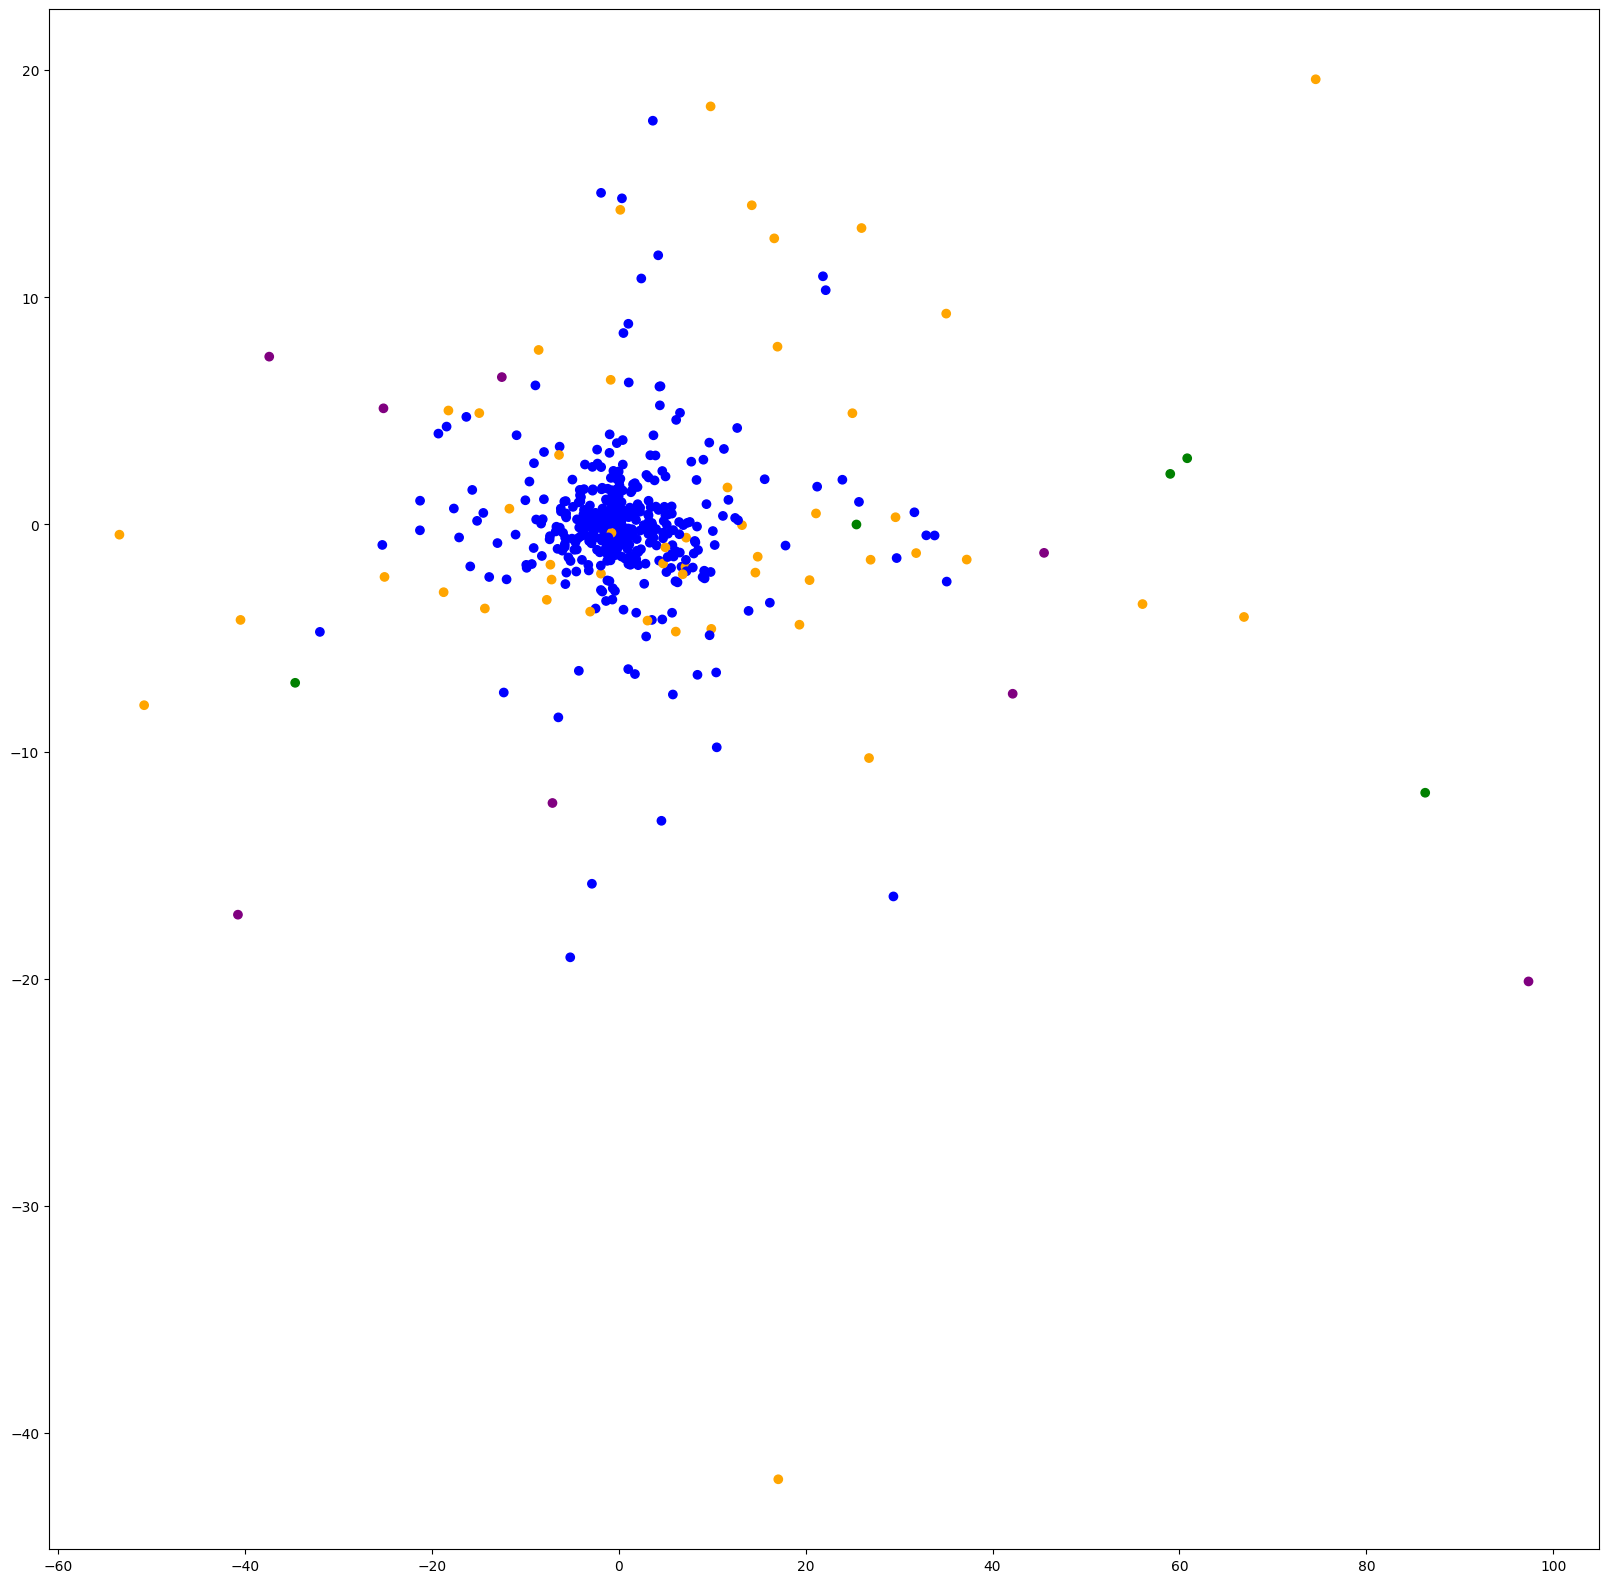

In [69]:
plt.figure(figsize=(20,20))
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict]
x = data[:500]
plt.scatter(x[:,2],x[:,20],color=colr)


Text(0, 0.5, '20')

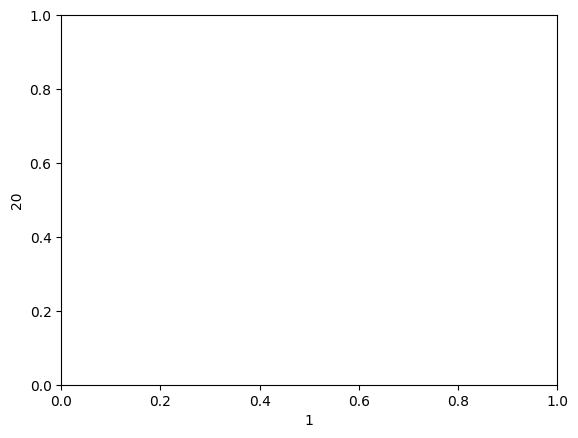

In [71]:
plt.xlabel('1')
plt.ylabel('20')

In [72]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

0.6091068899459956

In [73]:
#改为2时的结果
km = KMeans(n_clusters=2)
km.fit(x)  #开始训练
predict = km.predict(x)
silhouette_score(x, predict)

C:\DevEnvironment\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6779999767609067